In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
import string
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
Reviewdata = pd.DataFrame(data={'tweet_ID': [], 'Entity': [], 'Sentiment': [], 'Tweet_content': []})
Reviewdata.columns = ['tweet_ID', 'Entity', 'Sentiment', 'Tweet_content']

In [3]:
colnames=Reviewdata.columns = ['tweet_ID', 'Entity', 'Sentiment', 'Tweet_content']
Reviewdata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Internship/twitter_training.csv', names=colnames)
Reviewdata.head(10)

,tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [4]:
print(Reviewdata.shape)
print(Reviewdata.info())

(74682, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [5]:
Reviewdata.isnull().sum()

tweet_ID           0
Entity             0
Sentiment          0
Tweet_content    686
dtype: int64

In [6]:
Reviewdata.dropna(inplace=True)

In [7]:
Reviewdata.isnull().sum()

tweet_ID         0
Entity           0
Sentiment        0
Tweet_content    0
dtype: int64

### EDA

In [8]:
# Checking missing values in the dataset and calculating the percentage for each column
count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum() / len(Reviewdata)) * 100).sort_values(ascending=False)

# Creating a DataFrame to display count and percentage of missing values
missing_data = pd.concat([count, percentage], axis=1, keys=['Count', 'Percentage'])

# Printing count and percentage of missing values
print('Count and percentage of missing values for the columns:')
print(missing_data)

Count and percentage of missing values for the columns:
               Count  Percentage
tweet_ID           0         0.0
Entity             0         0.0
Sentiment          0         0.0
Tweet_content      0         0.0


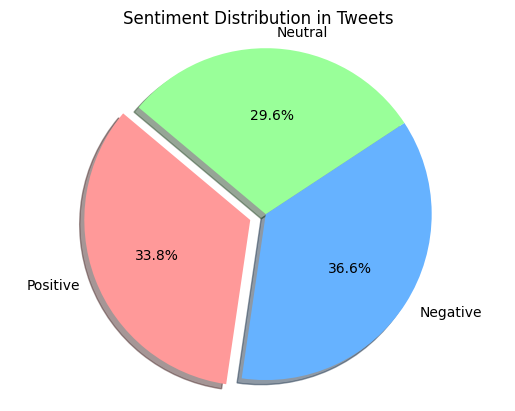

In [9]:
positive_tweets = Reviewdata[Reviewdata['Sentiment'] == 'Positive']
negative_tweets = Reviewdata[Reviewdata['Sentiment'] == 'Negative']
neutral_tweets = Reviewdata[Reviewdata['Sentiment'] == 'Neutral']

# Correcting the counts using the lengths of the filtered tweets
positive_count = len(positive_tweets)
negative_count = len(negative_tweets)
neutral_count = len(neutral_tweets)

labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]
colors = ['#FF9999', '#66B2FF', '#99FF99']

explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Sentiment Distribution in Tweets')
plt.show()

Percentage for default

Negative      30.22
Positive      27.91
Neutral       24.47
Irrelevant    17.40
Name: Sentiment, dtype: float64


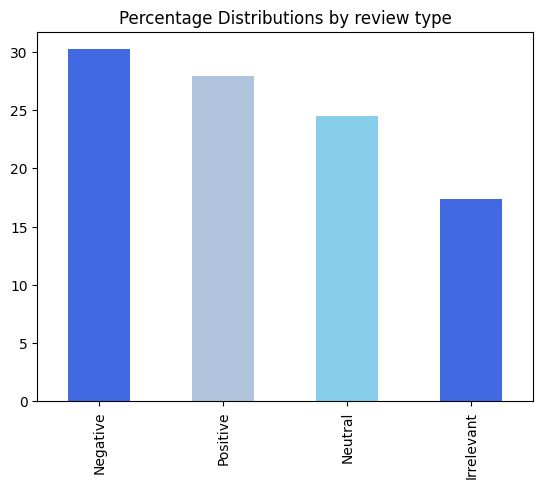

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# Displaying the percentage distribution of sentiment categories
print('Percentage for default\n')
print(round(Reviewdata.Sentiment.value_counts(normalize=True) * 100, 2))

# Creating a bar chart with a different color
round(Reviewdata.Sentiment.value_counts(normalize=True) * 100, 2).plot(kind='bar', color = ['royalblue', 'lightsteelblue', 'skyblue'])
plt.title('Percentage Distributions by review type')
plt.xlabel('')
plt.show()

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

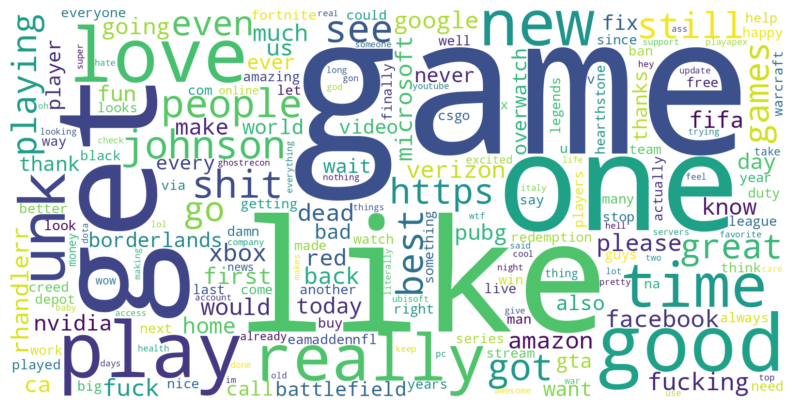

In [12]:
# Combining all tweets into single string
all_tweets = ' '.join(Reviewdata['Tweet_content'].dropna())

# Tokenization and preprocessing
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(all_tweets.lower())
tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Generating frequency distribution
freq_dist = FreqDist(tokens)

# Generating Word Cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate_from_frequencies(freq_dist)

# Plotting the Word Cloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

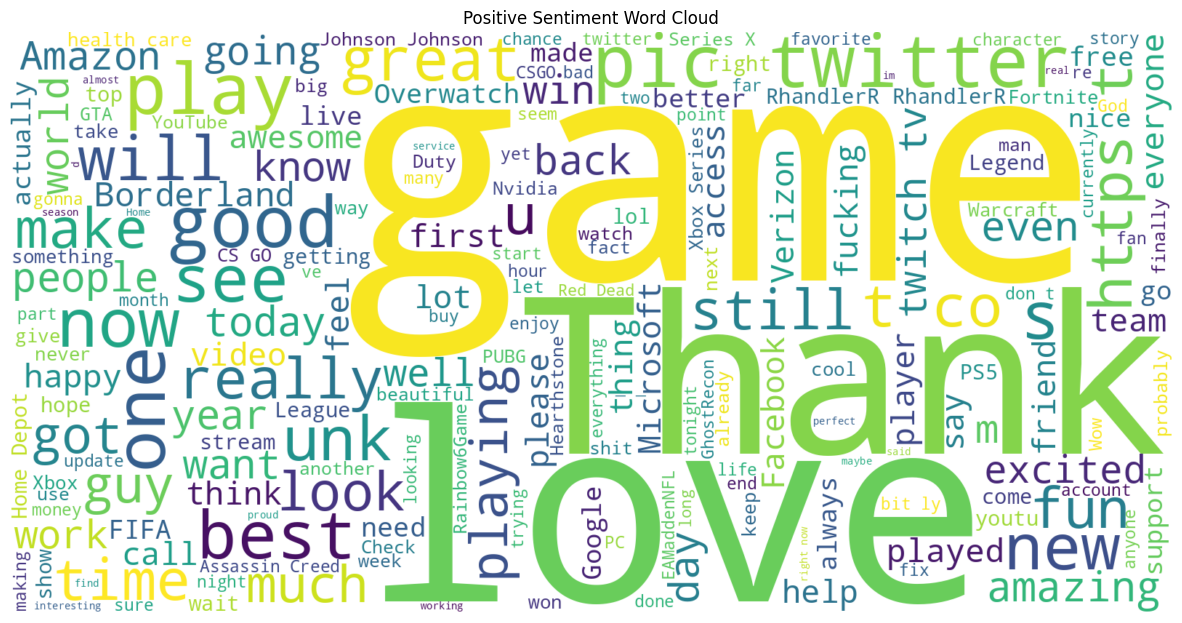

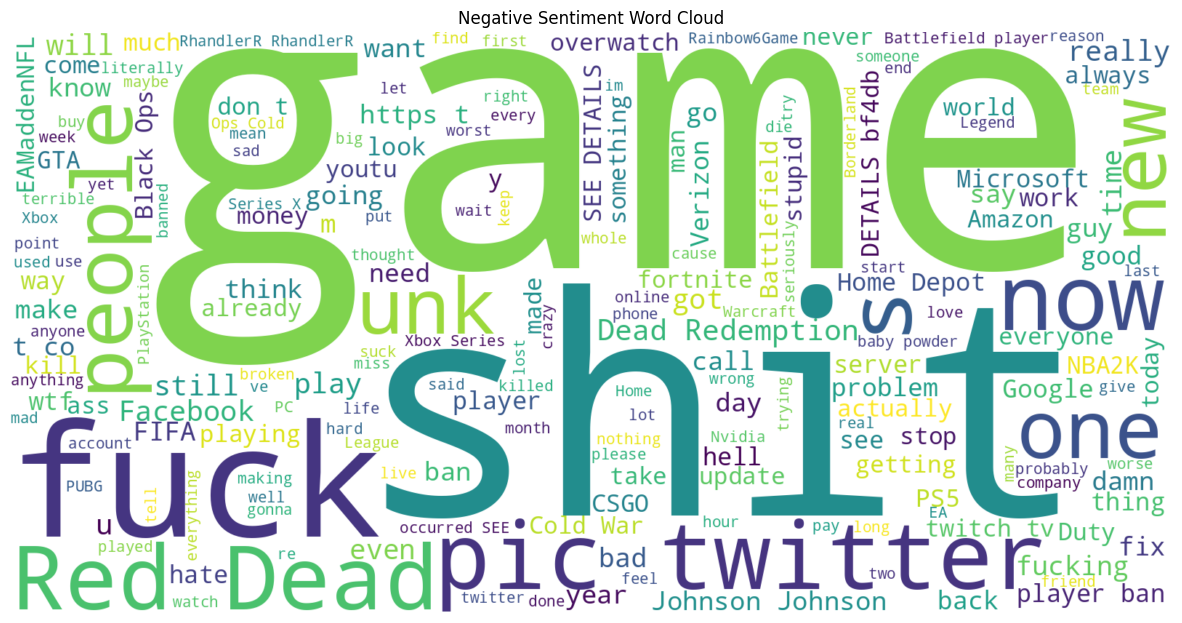

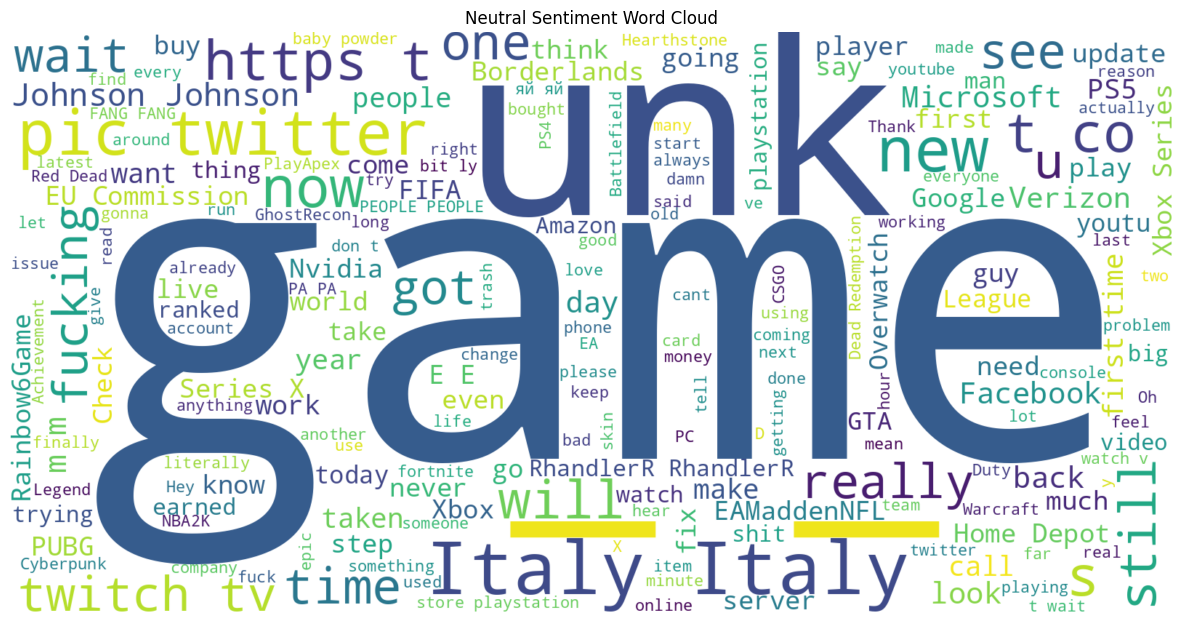

In [13]:
# Assumming you have already loaded your data into the Reviewdata DataFrame

tweets = Reviewdata['Tweet_content'].dropna()

# Initialize\ing SentimentIntensityAnalyzer from nltk
sia = SentimentIntensityAnalyzer()

# Categorizing tweets into positive, negative, and neutral
positive_tweets = [tweet for tweet in tweets if sia.polarity_scores(tweet)['compound'] > 0.1]
negative_tweets = [tweet for tweet in tweets if sia.polarity_scores(tweet)['compound'] < -0.1]
neutral_tweets = [tweet for tweet in tweets if -0.1 <= sia.polarity_scores(tweet)['compound'] <= 0.1]

# Generating and plotting word cloud with customizable size
def generate_wordcloud(text, title, width=800, height=400):
    wordcloud = WordCloud(width=width, height=height, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')  # Turn off the axis
    plt.title(title)
    plt.show()

# Generating and plotting larger word clouds for each sentiment
generate_wordcloud(positive_tweets, 'Positive Sentiment Word Cloud', width=1600, height=800)
generate_wordcloud(negative_tweets, 'Negative Sentiment Word Cloud', width=1600, height=800)
generate_wordcloud(neutral_tweets, 'Neutral Sentiment Word Cloud', width=1600, height=800)

In [14]:
Reviewdata.drop(columns=['tweet_ID','Entity'],inplace=True)
Reviewdata.head(10)

,Sentiment,Tweet_content
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
5,Positive,im getting into borderlands and i can murder y...
6,Positive,So I spent a few hours making something for fu...
7,Positive,So I spent a couple of hours doing something f...
8,Positive,So I spent a few hours doing something for fun...
9,Positive,So I spent a few hours making something for fu...


In [15]:
#Applying first level cleanning
import re
import string

def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?]','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

cleaned1 = lambda x: text_clean_1(x)

Reviewdata['cleaned_description'] = pd.DataFrame(Reviewdata['Tweet_content'].apply(cleaned1))
Reviewdata.head(10)

,Sentiment,Tweet_content,cleaned_description
0,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...
5,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...
6,Positive,So I spent a few hours making something for fu...,so i spent a few hours making something for fu...
7,Positive,So I spent a couple of hours doing something f...,so i spent a couple of hours doing something f...
8,Positive,So I spent a few hours doing something for fun...,so i spent a few hours doing something for fun...
9,Positive,So I spent a few hours making something for fu...,so i spent a few hours making something for fu...


In [16]:
#Applying second round of cleanning
def text_clean_2(text):
    text = re.sub('[''""...]','',text)
    text = re.sub('\n','',text)
    return text
cleaned2 = lambda x: text_clean_2(x)

Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned2))
Reviewdata.head()

,Sentiment,Tweet_content,cleaned_description,cleaned_description_new
0,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,i am coming to the borders and i will kill you...
2,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,im getting on borderlands and i will kill you all
3,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...,im getting on borderlands and i will murder y...


In [17]:
# Model Training
from sklearn.model_selection import train_test_split

Independent_var = Reviewdata.cleaned_description_new
Dependent_var = Reviewdata.Sentiment

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size=0.1, random_state=225)

print('IV_train:', len(IV_train))
print('IV_test:', len(IV_test))  # Corrected the variable name in the print statement
print('DV_train:', len(DV_train))
print('DV_test:', len(DV_test))  # Corrected the variable name in the print statement

IV_train: 66596
IV_test: 7400
DV_train: 66596
DV_test: 7400


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Sampling data (replace this with actual training data)
IV_train_sample = ["This is a positive review.", "This is a negative review.", "Another positive example."]
DV_train_sample = ["Positive", "Negative", "Positive"]

# Creating a TF-IDF vectorizer and logistic regression classifier pipeline
model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='lbfgs'))
])

# Fitting the pipeline on the training data
model_pipeline.fit(IV_train_sample, DV_train_sample)

# Now we can use the trained model for predictions

predictions = model_pipeline.predict(IV_test)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix  # Import the confusion_matrix function

# Define your TF-IDF vectorizer and logistic regression classifier
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver='lbfgs')

# Create a pipeline with TF-IDF vectorizer and logistic regression classifier
model = Pipeline([('vectorizer', tvec), ('classifier', clf2)])

# Assuming IV_train and DV_train are your training data
# Assuming IV_test and DV_test are your testing data
# Fit the model on the training data
model.fit(IV_train, DV_train)

# Make predictions on the test data
predictions = model.predict(IV_test)

# Compute and print the confusion matrix
conf_matrix = confusion_matrix(predictions, DV_test)
print(conf_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 858   81   86   98]
 [ 144 1824  240  210]
 [  94  144 1266  152]
 [ 156  130  211 1706]]


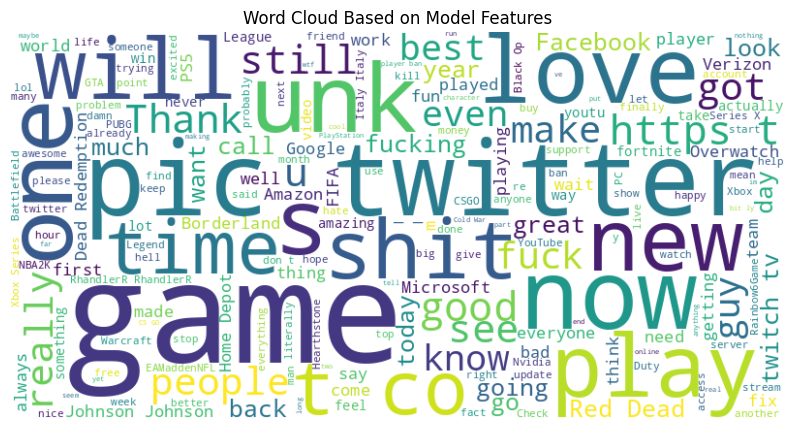

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combinning all tweets into a single string
text_data = " ".join(Reviewdata['Tweet_content'].astype(str))

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plotting the Word Cloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud Based on Model Features')
plt.show()

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate and print accuracy, precision, and recall
print("Accuracy:", accuracy_score(predictions, DV_test))
print("Precision:", precision_score(predictions, DV_test, average='weighted'))
print("Recall:", recall_score(predictions, DV_test, average='weighted'))

Accuracy: 0.764054054054054
Precision: 0.7691327686683874
Recall: 0.764054054054054


In [22]:
example = ['Nvidia doesn’t intend to give its opinion']
result = model_pipeline.predict(example)
print(result)

['Positive']


In [23]:
example = ["This is all based on last quarter's earnings."]
result = model.predict(example)
print(result)

['Irrelevant']


In [24]:
example = ["This is all based on last quarter's earnings."]
result = model_pipeline.predict(example)
print(result)

['Positive']


In [25]:
example = ["you are a Simp"]
result = model_pipeline.predict(example)
print(result)

['Positive']


In [26]:
example = ['Wonderful summer photos ' ]
result = model.predict(example)
print(result)

['Neutral']


In [27]:
example = ['Nvidia doesn’t intend to give its opinion ']
result = model.predict(example)
print(result)

['Neutral']


In [28]:
example = ["borderland game is amazing"]
result = model.predict(example)
print(result)

['Positive']
